## Final Project Submission

Please fill out:
* Student name: Saifuddin Anjarwalla
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: Monday 22nd June
* Instructor name: Jeff Herman
* Blog post URL:


# Module 1 Project (Technical Notebook)


## Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pandasql import sqldf
pysqldf = lambda q:sqldf(q, globals())

## Reading data sets
1. loading them at dataframes
2. viewing key information about the datasets

In [3]:
df1 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
display(df1.head())
display(df1.info())

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

In [4]:
df2 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
display(df2.head())
display(df2.info())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

In [5]:
df3 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
display(df3.head())
display(df3.info())

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


None

## Cleaning Data

### Starting with df2
1. drop start_year, original_title
2. change primary title to movie_title
3. de-capitalize all movie titles
4. de-capitalize call genres (may have to do this later)
3. make runtime_minutes into int64

In [6]:
df2 = df2.drop(['original_title', 'start_year'], axis =1)

In [7]:
df2 = df2.rename(columns={'primary_title' : 'movie_title'})

In [8]:
%%timeit
df2['movie_title'] = df2['movie_title'].apply(lambda x: x.lower())

44.9 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit
df2['genres'] = df2['genres'].str.lower()

52 ms ± 8.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
df2.head()

,tconst,movie_title,runtime_minutes,genres
0,tt0063540,sunghursh,175.0,"action,crime,drama"
1,tt0066787,one day before the rainy season,114.0,"biography,drama"
2,tt0069049,the other side of the wind,122.0,drama
3,tt0069204,sabse bada sukh,NaN,"comedy,drama"
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy"


### Moving to df3
1. join df2 and df3 to make df4
2. check for duplicate rows
3. get rid of rows with a missing value

In [11]:
q4 = """ SELECT * 
         FROM df2
         JOIN df3
         USING (tconst)"""
df4 = pysqldf(q4)

In [12]:
df4.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers
0,tt0063540,sunghursh,175.0,"action,crime,drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,one day before the rainy season,114.0,"biography,drama",nm0002411,None
2,tt0069049,the other side of the wind,122.0,drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,sabse bada sukh,NaN,"comedy,drama",nm0611531,nm0347899
4,tt0100275,the wandering soap opera,80.0,"comedy,drama,fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [13]:
df4[df4.duplicated()] #okay so no duplicates thats good

,tconst,movie_title,runtime_minutes,genres,directors,writers


In [14]:
df4[df4.duplicated(subset='tconst')] #being extra careful to confirm

,tconst,movie_title,runtime_minutes,genres,directors,writers


In [15]:
df4.isna().sum()

tconst                 0
movie_title            0
runtime_minutes    31739
genres              5408
directors           5727
writers            35883
dtype: int64

### Moving to df1
1. format release data
2. Add day of the week column
3. Add month column
2. format the money columns
3. rename movie columns
4. make ROI column

In [16]:
df1['release_date'] = pd.to_datetime(df1['release_date'])
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
df1['movie'] = df1['movie'].str.lower()

In [18]:
df1['release_day'] = df1['release_date'].dt.day_name()

In [19]:
df1['release_month'] = df1['release_date'].dt.month_name()

In [20]:
df1['release_year'] = pd.DatetimeIndex(df1['release_date']).year

In [21]:
df1['production_budget'] = df1['production_budget'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
df1['domestic_gross'] = df1['domestic_gross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)
df1['worldwide_gross'] = df1['worldwide_gross'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.int64)

In [22]:
df1.head() #everything is in order to far

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_day,release_month,release_year
0,1,2009-12-18,avatar,425000000,760507625,2776345279,Friday,December,2009
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,Friday,May,2011
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,Friday,June,2019
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,Friday,May,2015
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,Friday,December,2017


In [23]:
df1['revenue'] = df1['worldwide_gross'] + df1['domestic_gross']

In [24]:
df1['profit'] = (df1['revenue'] - df1['production_budget'])

In [25]:
df1['roi'] = df1['profit']/df1['production_budget']

In [26]:
df1 = df1.drop(['domestic_gross', 'worldwide_gross'], axis = 1)

In [27]:
df1 = df1.rename(columns={'movie' : 'movie_title'})

In [28]:
df1.head()

,id,release_date,movie_title,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,1,2009-12-18,avatar,425000000,Friday,December,2009,3536852904,3111852904,7.322007
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,Friday,May,2011,1286727750,876127750,2.133774
2,3,2019-06-07,dark phoenix,350000000,Friday,June,2019,192524700,-157475300,-0.449929
3,4,2015-05-01,avengers: age of ultron,330600000,Friday,May,2015,1862019831,1531419831,4.632244
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,Friday,December,2017,1936903129,1619903129,5.110105


### Putting it all together
1. join df4 with df1 using movie_title to make df5
2. check for duplicates
3. treat missing values

In [29]:
q5 = """SELECT * 
        FROM df4
        JOIN df1
        USING (movie_title);"""
df5 = pysqldf(q5)

In [30]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
1,tt0293429,mortal kombat,NaN,"action,adventure,fantasy",nm2585406,nm3859643,10,1995-08-18 00:00:00.000000,20000000,Friday,August,1995,192566454,172566454,8.628323
2,tt0326592,the overnight,88.0,None,nm1208371,"nm1170333,nm1208371",21,2015-06-19 00:00:00.000000,200000,Friday,June,2015,2275804,2075804,10.379020
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374


In [31]:
len(df5)

3891

#3815 is less than i thought i am going to de capitalize all movie titles in df1 and df4
#nothing changed

In [32]:
df5[df5.duplicated()] #okay so no duplicates thats good

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi


In [33]:
df5.isna().sum() #so i need to keep all genres, diretors and runtime so i will deal with those firse
                 #if there are still a lot of blank writers then i may have to delete the column

tconst                 0
movie_title            0
runtime_minutes      494
genres                73
directors             90
writers              473
id                     0
release_date           0
production_budget      0
release_day            0
release_month          0
release_year           0
revenue                0
profit                 0
roi                    0
dtype: int64

In [34]:
df5 = df5.dropna(subset =['runtime_minutes'])

In [35]:
df5.isna().sum() #okay as a result we decide to drop all rows with empty data

tconst                 0
movie_title            0
runtime_minutes        0
genres                19
directors             39
writers              334
id                     0
release_date           0
production_budget      0
release_day            0
release_month          0
release_year           0
revenue                0
profit                 0
roi                    0
dtype: int64

In [36]:
df5 = df5.dropna(subset =['runtime_minutes', 'genres', 'directors', 'writers'])
df5.isna().sum() 

tconst               0
movie_title          0
runtime_minutes      0
genres               0
directors            0
writers              0
id                   0
release_date         0
production_budget    0
release_day          0
release_month        0
release_year         0
revenue              0
profit               0
roi                  0
dtype: int64

In [37]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374
5,tt0365907,a walk among the tombstones,114.0,"action,crime,drama",nm0291082,"nm0088747,nm0291082",67,2014-09-19 00:00:00.000000,28000000,Friday,September,2014,88126272,60126272,2.147367
6,tt0369610,jurassic world,124.0,"action,adventure,sci-fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",34,2015-06-12 00:00:00.000000,215000000,Friday,June,2015,2301125489,2086125489,9.702909


## Data exploration

### The questions we will try to explore
1. budget to ROI
2. runtime to ROI
3. release day to ROI
4. release month to ROI
5. genres to ROI 
6. GDP on ROI


#### 1. Burget to ROI

In [38]:
df5.describe()

,runtime_minutes,id,production_budget,release_year,revenue,profit,roi
count,3046.000000,3046.000000,3.046000e+03,3046.000000,3.046000e+03,3.046000e+03,3046.000000
mean,100.249508,51.060735,3.404807e+07,2009.941563,1.418934e+08,1.078453e+08,4.945742
std,24.515954,28.561815,4.712946e+07,9.581208,2.700954e+08,2.359704e+08,20.517901
min,1.000000,1.000000,1.400000e+03,1915.000000,0.000000e+00,-1.574753e+08,-1.000000
25%,89.000000,27.250000,5.000000e+06,2010.000000,3.372858e+06,-1.000000e+06,-0.538875
50%,100.000000,51.000000,1.665000e+07,2013.000000,4.495364e+07,2.467459e+07,1.299430
75%,113.000000,76.000000,4.000000e+07,2015.000000,1.483302e+08,1.080977e+08,4.444638
max,360.000000,100.000000,4.250000e+08,2019.000000,3.536853e+09,3.111853e+09,643.208840


In [39]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Text(0.5, 1.0, 'How ROI Changes When Movie Budget Increases')

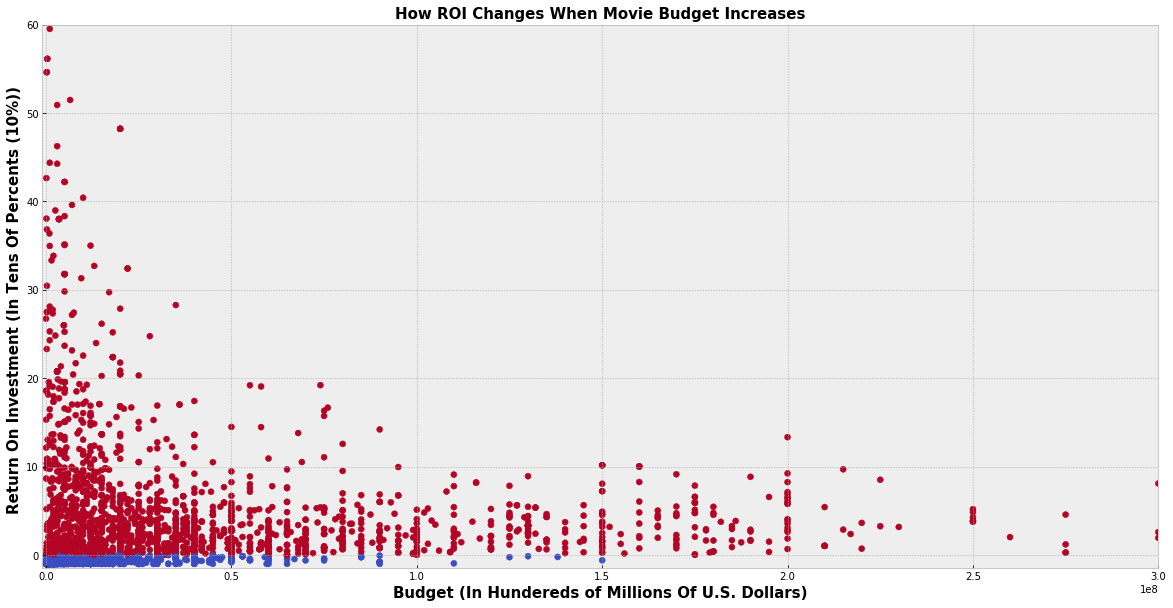

In [40]:
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(x=df5["production_budget"], y=df5["roi"], c=np.sign(df5["roi"]), cmap="coolwarm")
ax.set_ylim(-1.5, 60)
ax.set_xlim(-1000000, 300000000)
plt.xlabel('Budget (In Hundereds of Millions Of U.S. Dollars)', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Tens Of Percents (10%)) ', fontsize = 15, weight ='bold')
plt.title('How ROI Changes When Movie Budget Increases', fontsize = 15, weight ='bold')

#### 2. Runtime to ROI

Text(0.5, 1.0, 'Histogram To Dhow The Length Of Movies')

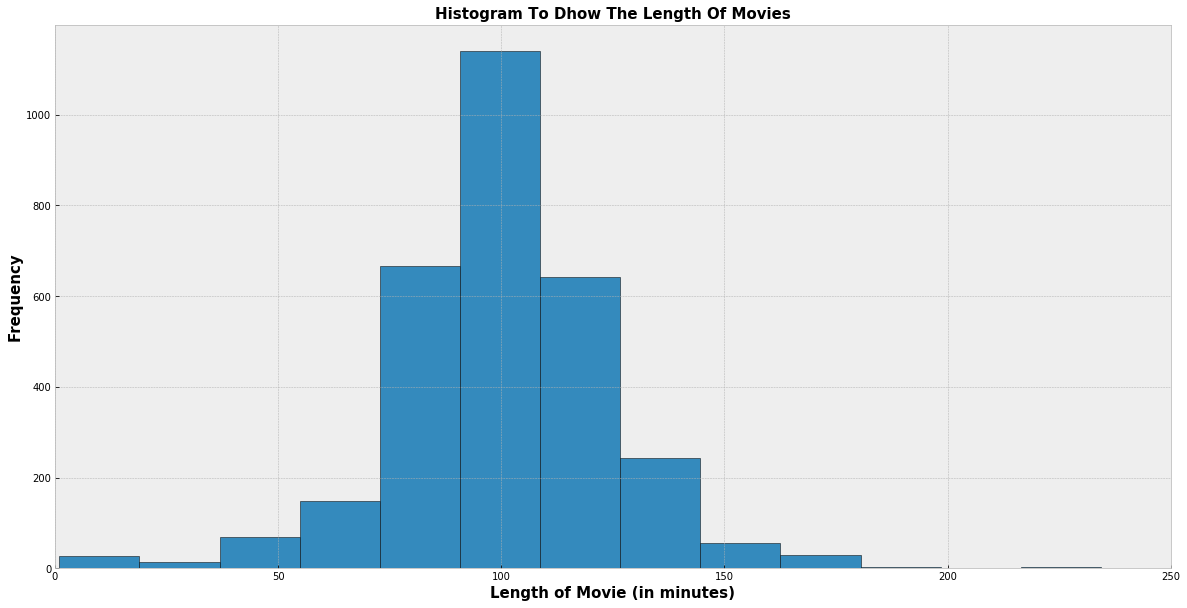

In [41]:
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.hist((df5['runtime_minutes']), bins = 20, edgecolor = 'black')
plt.xlim(0, 250)
plt.xlabel('Length of Movie (in minutes)', fontsize = 15 , weight ='bold')
plt.ylabel('Frequency' , fontsize = 15, weight ='bold')
plt.title('Histogram To Dhow The Length Of Movies', fontsize = 15, weight ='bold')

Text(0.5, 1.0, 'How ROI Changes When Movie Length increases')

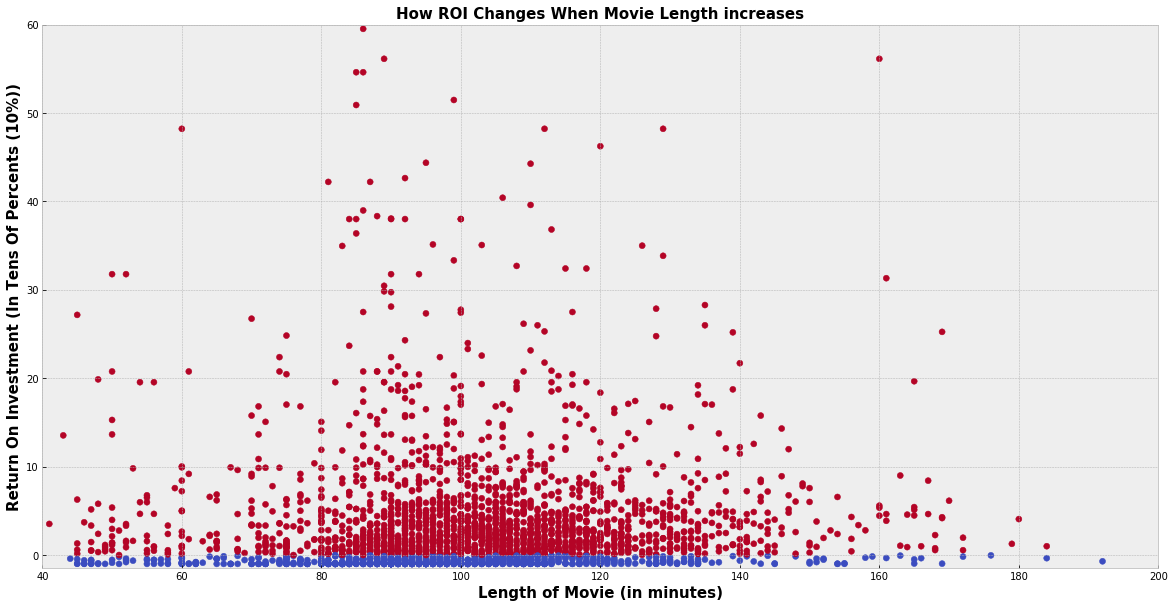

In [42]:
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.scatter(x=df5["runtime_minutes"], y=df5["roi"], c=np.sign(df5["roi"]), cmap="coolwarm")
ax.set_ylim(-1.5, 60)
ax.set_xlim(40, 200)
plt.xlabel('Length of Movie (in minutes)', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Tens Of Percents (10%))', fontsize = 15, weight ='bold')
plt.title('How ROI Changes When Movie Length increases', fontsize = 15, weight ='bold')

#### 3. Release month to ROI

In [43]:
release_month_df = df5[['release_month', 'roi']]

In [44]:
release_month_df_grouped = release_month_df.groupby(['release_month'], as_index=False).mean().sort_values(by=['roi'])
release_month_df_grouped.head()

,release_month,roi
2,December,2.346121
7,March,2.958741
11,September,3.043325
8,May,3.169553
6,June,3.533801


Text(0.5, 1.0, 'How Movie ROI Changes Dempending On The Month The Year When The Movie Is Released')

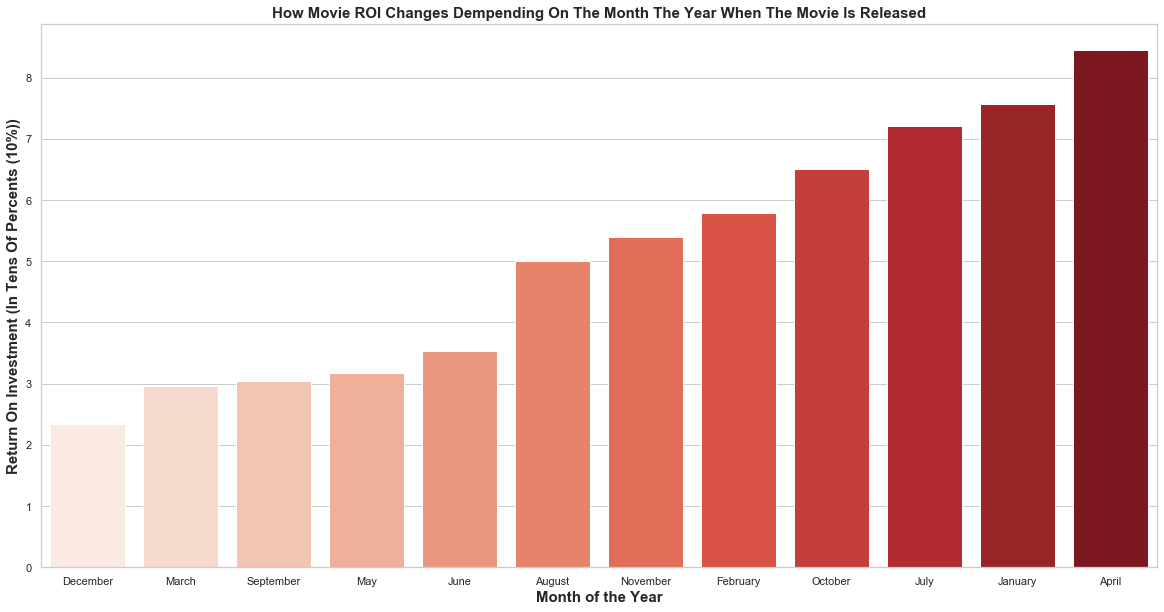

In [45]:
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x="release_month", y="roi",palette="Reds", data=release_month_df_grouped)
plt.xlabel('Month of the Year', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Tens Of Percents (10%))', fontsize = 15, weight ='bold')
plt.title('How Movie ROI Changes Dempending On The Month The Year When The Movie Is Released', fontsize = 15, weight ='bold')

#### 4. Release Week to ROI


In [46]:
df5.head()

,tconst,movie_title,runtime_minutes,genres,directors,writers,id,release_date,production_budget,release_day,release_month,release_year,revenue,profit,roi
0,tt0249516,foodfight!,91.0,"action,animation,comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",26,2012-12-31 00:00:00.000000,45000000,Monday,December,2012,73706,-44926294,-0.998362
3,tt0337692,on the road,124.0,"adventure,drama,romance",nm0758574,"nm0449616,nm1433580",17,2013-03-22 00:00:00.000000,25000000,Friday,March,2013,10034130,-14965870,-0.598635
4,tt0359950,the secret life of walter mitty,114.0,"adventure,comedy,drama",nm0001774,"nm0175726,nm0862122",37,2013-12-25 00:00:00.000000,91000000,Wednesday,December,2013,246098021,155098021,1.704374
5,tt0365907,a walk among the tombstones,114.0,"action,crime,drama",nm0291082,"nm0088747,nm0291082",67,2014-09-19 00:00:00.000000,28000000,Friday,September,2014,88126272,60126272,2.147367
6,tt0369610,jurassic world,124.0,"action,adventure,sci-fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",34,2015-06-12 00:00:00.000000,215000000,Friday,June,2015,2301125489,2086125489,9.702909


In [47]:
release_week_df = df5[['release_day', 'roi', 'revenue', 'profit']]

In [48]:
release_day_df_grouped = release_week_df.groupby(['release_day'], as_index=False).mean().sort_values(by=['roi'])
release_day_df_grouped.head()

,release_day,roi,revenue,profit
2,Saturday,0.346472,2.943896e+07,1.942159e+07
0,Friday,4.273476,1.493764e+08,1.132361e+08
5,Tuesday,4.467681,2.732661e+07,1.583631e+07
1,Monday,5.833962,1.329007e+07,6.624885e+06
6,Wednesday,5.959717,1.840018e+08,1.448199e+08


Text(0.5, 1.0, 'How Movie ROI Changes Dempending On The Day Of The Week The Movie Is Released')

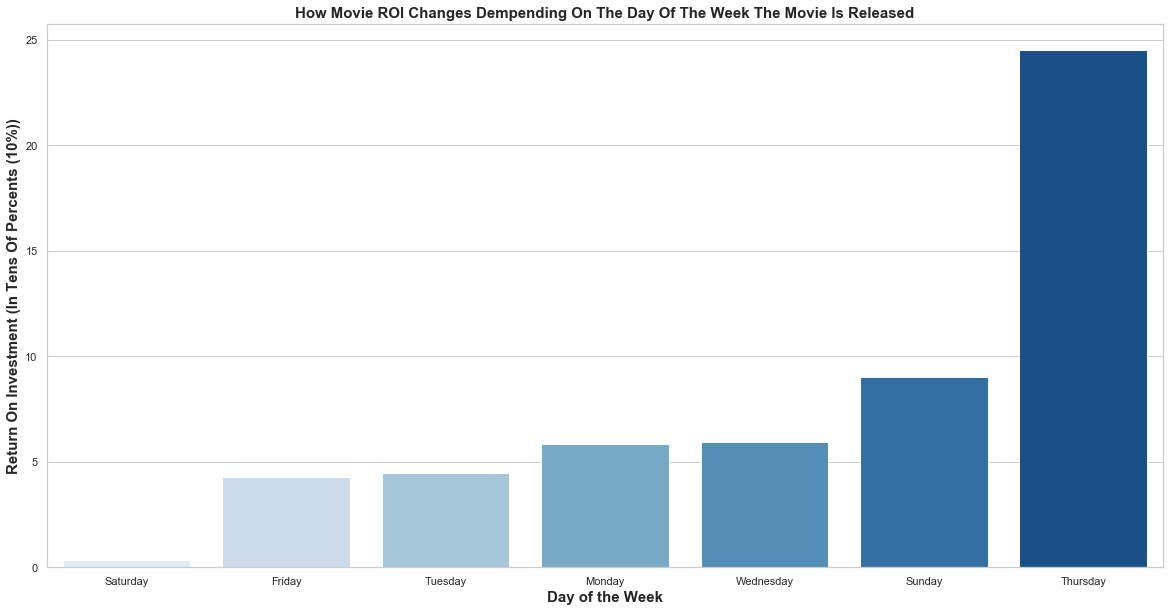

In [49]:
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x="release_day", y="roi", data=release_day_df_grouped, palette="Blues")
plt.xlabel('Day of the Week', fontsize = 15 , weight ='bold')
plt.ylabel('Return On Investment (In Tens Of Percents (10%))', fontsize = 15, weight ='bold')
plt.title('How Movie ROI Changes Dempending On The Day Of The Week The Movie Is Released', fontsize = 15, weight ='bold')

lets see how Profit and Revenue also fare based on which day of the week the movie is released

Text(0.5, 1.0, 'How Movie Profit Changes Dempending On The Day Of The Week The Movie Is Released')

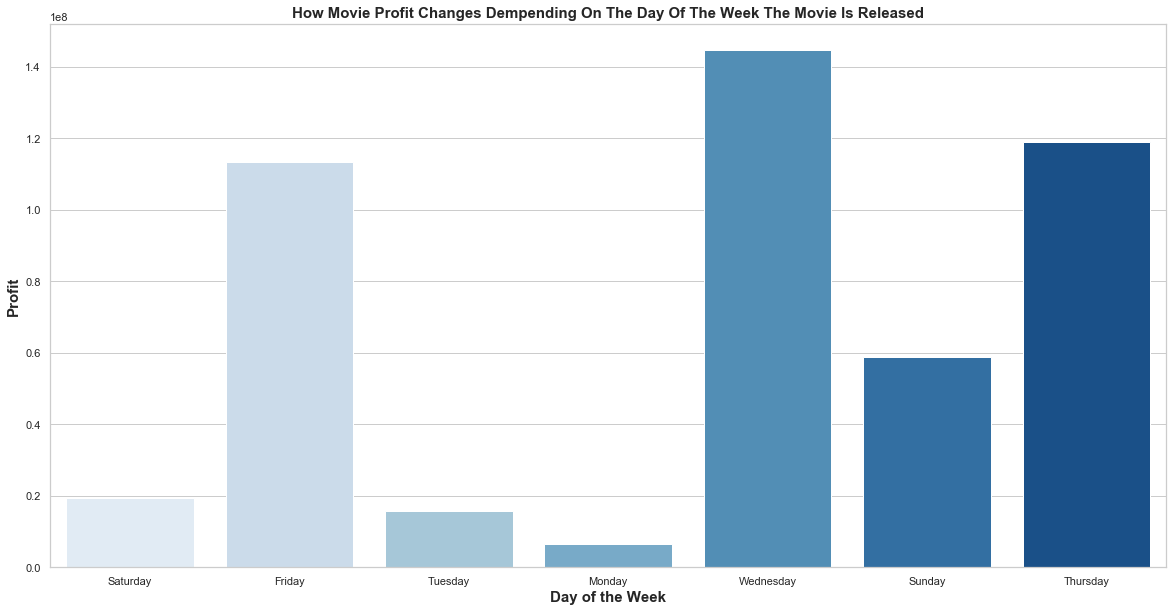

In [50]:
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x="release_day", y="profit", data=release_day_df_grouped, palette="Blues")
plt.xlabel('Day of the Week', fontsize = 15 , weight ='bold')
plt.ylabel('Profit', fontsize = 15, weight ='bold')
plt.title('How Movie Profit Changes Dempending On The Day Of The Week The Movie Is Released', fontsize = 15, weight ='bold')

Text(0.5, 1.0, 'How Movie Revenue Changes Dempending On The Day Of The Week The Movie Is Released')

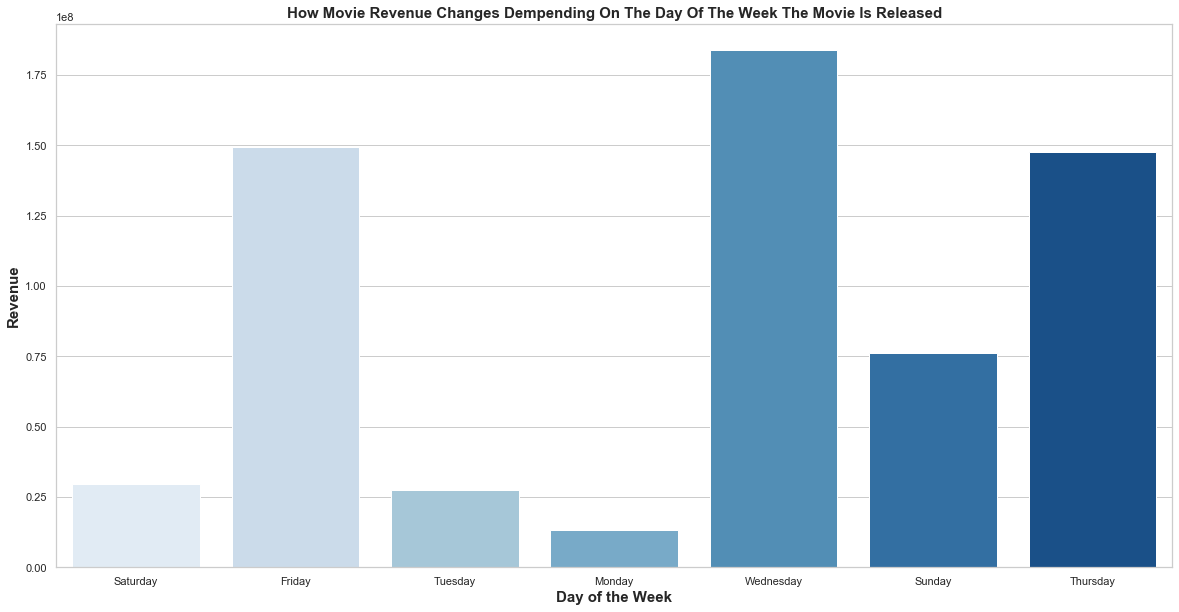

In [51]:

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x="release_day", y="revenue", data=release_day_df_grouped, palette="Blues")
plt.xlabel('Day of the Week', fontsize = 15 , weight ='bold')
plt.ylabel('Revenue', fontsize = 15, weight ='bold')
plt.title('How Movie Revenue Changes Dempending On The Day Of The Week The Movie Is Released', fontsize = 15, weight ='bold')

#### 5. GDP on ROI
1. for this we need to add another dataset - world average GDP growth rates 

In [52]:
df_excel_gdp = pd.read_excel('zippedData/mod1_finalproject_worldgdpgrowth.xlsx')
df_excel_gdp.head()

,release_year,world_gdp_growth
0,1980,1.904
1,1981,1.923
2,1982,0.431
3,1983,2.412
4,1984,4.506


In [53]:
df_gross_stats = df5[['release_year', 'revenue','profit', 'roi', 'production_budget']]
df_gross_stats.head()

,release_year,revenue,profit,roi,production_budget
0,2012,73706,-44926294,-0.998362,45000000
3,2013,10034130,-14965870,-0.598635,25000000
4,2013,246098021,155098021,1.704374,91000000
5,2014,88126272,60126272,2.147367,28000000
6,2015,2301125489,2086125489,9.702909,215000000


In [54]:
df_gross_stats_grouped = df_gross_stats.groupby(['release_year'], as_index=False).mean().sort_values(by=['release_year'])
df_gross_stats_grouped.head()

,release_year,revenue,profit,roi,production_budget
0,1915,21000000.0,20890000.0,189.909091,110000.0
1,1927,0.0,-2000000.0,-1.000000,2000000.0
2,1940,128960592.5,126923969.0,56.425918,2036623.5
3,1942,370797000.0,369939000.0,431.164336,858000.0
4,1944,4000000.0,-1200000.0,-0.230769,5200000.0


In [55]:
df_gross_stats_grouped = df_gross_stats_grouped.loc[(df_gross_stats_grouped['release_year']>1979) & (df_gross_stats_grouped['release_year']<2015) ]

In [56]:
qgdp = """ SELECT * 
         FROM df_gross_stats_grouped
         JOIN df_excel_gdp
         USING (release_year)"""
df_gdp = pysqldf(qgdp)

In [57]:
df_gdp.head()

,release_year,revenue,profit,roi,production_budget,world_gdp_growth
0,1980,3.089214e+07,1.478214e+07,12.946811,16110000.0,1.904
1,1981,6.116128e+07,4.816128e+07,9.068278,13000000.0,1.923
2,1982,7.870255e+07,7.042755e+07,5.268793,8275000.0,0.431
3,1983,2.875329e+07,1.882829e+07,2.217587,9925000.0,2.412
4,1984,1.881210e+08,1.784110e+08,20.526439,9710000.0,4.506


Text(0.5, 1.0, 'How World GDP affect Movie ROI')

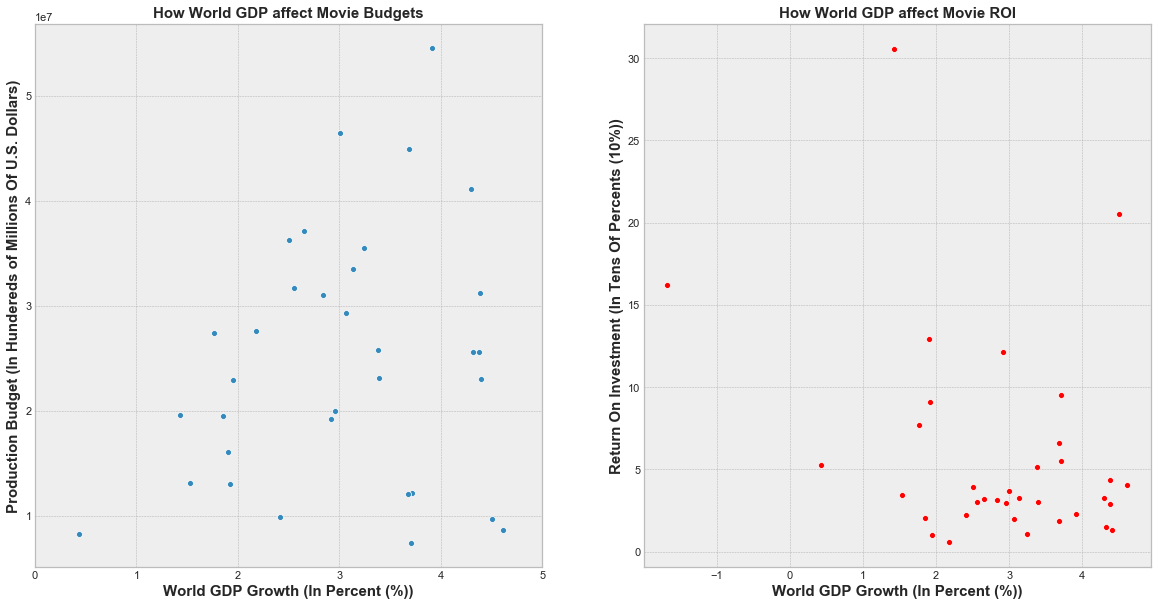

In [58]:
plt.style.use('bmh')
fig, (ax,ax1) = plt.subplots(1,2)
fig.set_size_inches(20,10)
ax = sns.scatterplot(x="world_gdp_growth", y="production_budget", data=df_gdp, ax=ax)
ax.set_xlim(0, 5)
ax.set_xlabel('World GDP Growth (In Percent (%))', fontsize = 15 , weight ='bold')
ax.set_ylabel('Production Budget (In Hundereds of Millions Of U.S. Dollars)', fontsize = 15, weight ='bold')
ax.set_title('How World GDP affect Movie Budgets', fontsize = 15, weight ='bold')
ax1 = sns.scatterplot(x="world_gdp_growth", y="roi", data=df_gdp, color = 'red',ax=ax1)
ax1.set_xlabel('World GDP Growth (In Percent (%))', fontsize = 15 , weight ='bold')
ax1.set_ylabel('Return On Investment (In Tens Of Percents (10%))', fontsize = 15, weight ='bold')
ax1.set_title('How World GDP affect Movie ROI', fontsize = 15, weight ='bold')

#### 6. genres on ROI
1. all the genres are grouped in the single column there for we need to seperate all the genres for each movie

In [59]:
test = df5[['genres']]
test = test.genres.str.split(',', expand = True)
test.columns = ['genres1', 'genres2', 'genres3']
test.head(5)

,genres1,genres2,genres3
0,action,animation,comedy
3,adventure,drama,romance
4,adventure,comedy,drama
5,action,crime,drama
6,action,adventure,sci-fi


In [60]:
allgenres = list(df5.genres.unique())
def listtostring(s):
    string = ""
    for e in s:
        string += e
        string += ','
    return string

In [61]:
allgenres_nocommas = listtostring(allgenres).replace(',',' ')
uniquegenres = set(allgenres_nocommas.split())

In [62]:
for c in uniquegenres:
    test[c] =  np.nan

In [63]:
test2 = test.copy()

In [64]:
test2 = test2.set_index([list(range(0,len(test2)))])

In [65]:
for i in list(range(0,len(test2))):
    for g in list(uniquegenres):
        if g in np.array(test2.iloc[i]):
            test2.at[i,g] = 1
        else:
            test2.at[i,g] = 0

In [66]:
genresdf5 = df5[['roi','profit','revenue', 'production_budget','genres']]
genresdf5 = genresdf5.set_index([list(range(0,len(genresdf5)))])

In [67]:
df_genres = pd.concat([genresdf5, test2], axis=1)

In [68]:
roi_for_genres = []
for x in list(uniquegenres):
    test6 = df_genres.loc[(df_genres[x]==1)].mean()
    roi_for_genres.append(test6.roi)

In [69]:
df_roi_genres = pd.DataFrame(list(zip(list(uniquegenres), roi_for_genres)), columns =['genre', 'mean_roi']).sort_values(by=['mean_roi'])

Text(0.5, 1.0, 'Which Genres Generate The Highest ROI')

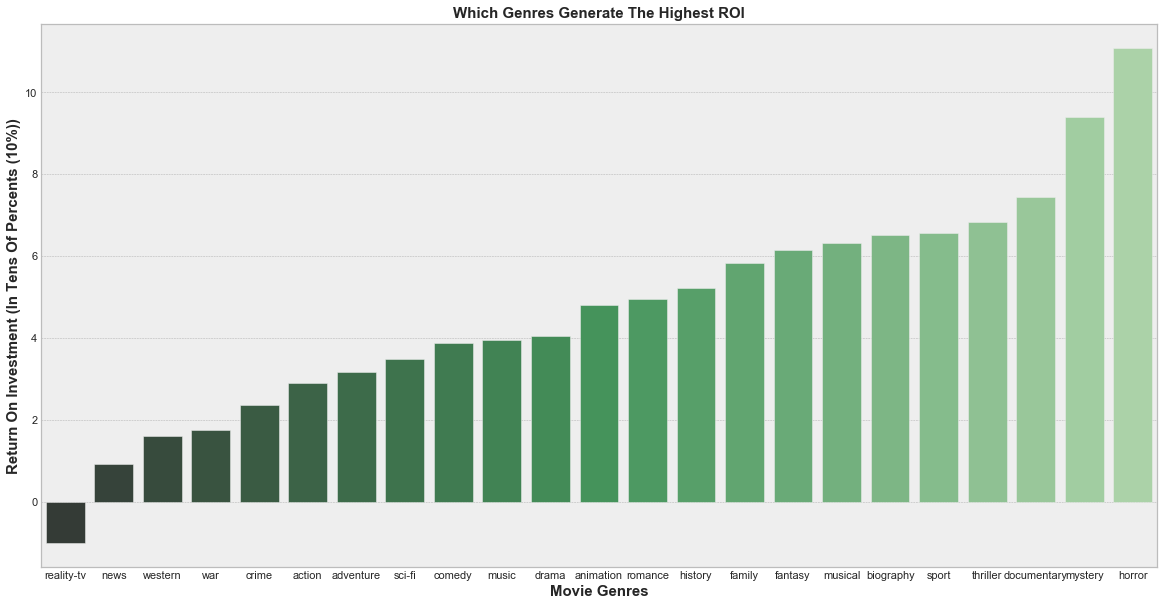

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x="genre", y="mean_roi", data=df_roi_genres, palette = 'Greens_d')
ax.set_xlabel('Movie Genres', fontsize = 15 , weight ='bold')
ax.set_ylabel('Return On Investment (In Tens Of Percents (10%))', fontsize = 15, weight ='bold')
ax.set_title('Which Genres Generate The Highest ROI', fontsize = 15, weight ='bold')

Lets plot the genre to budget to see if this perhaps adds some more logic to the graph above

In [71]:
budget_for_genres = []
for x in list(uniquegenres):
    test6 = df_genres.loc[(df_genres[x]==1)].mean()
    budget_for_genres.append(test6.production_budget)

In [72]:
df_budget_genres = pd.DataFrame(list(zip(list(uniquegenres), budget_for_genres, roi_for_genres)), columns =['genre', 'mean_budget', 'mean_roi']).sort_values(by=['mean_roi'])

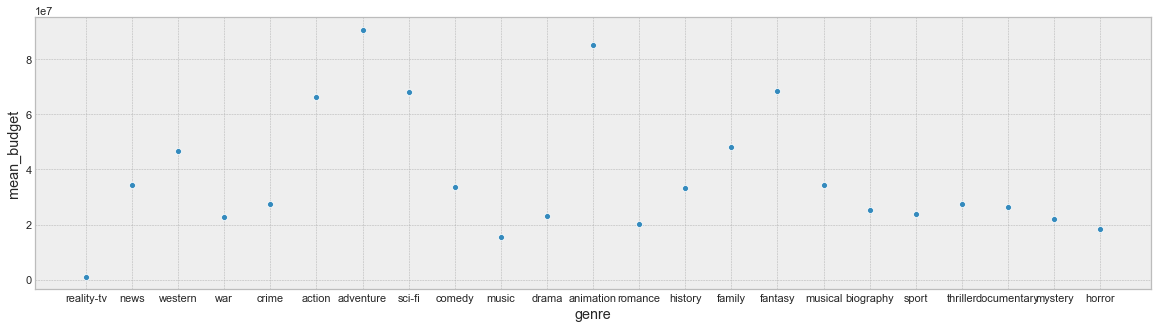

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
ax = sns.scatterplot(x="genre", y="mean_budget", data=df_budget_genres)